In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

# Linear Regression
from sklearn.linear_model import LinearRegression

# Lasso Regression
from sklearn.linear_model import Lasso

# XGBoost Regression
from xgboost import XGBRegressor

# RandomForest Regression
from sklearn.ensemble import RandomForestRegressor


In [2]:
df = pd.read_csv("Dataset/gld_price_data.csv")

In [3]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
df.tail(5)

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
df.shape

(2290, 6)

In [8]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
# Data visualization

sns.set()

In [10]:
# Finding the correlation in the dataset
# Positive correlation [Duration and calories column (Proportional relation)]
# Negative correlation [Indirect relation]

correlation = df.corr(numeric_only=True)

<Axes: >

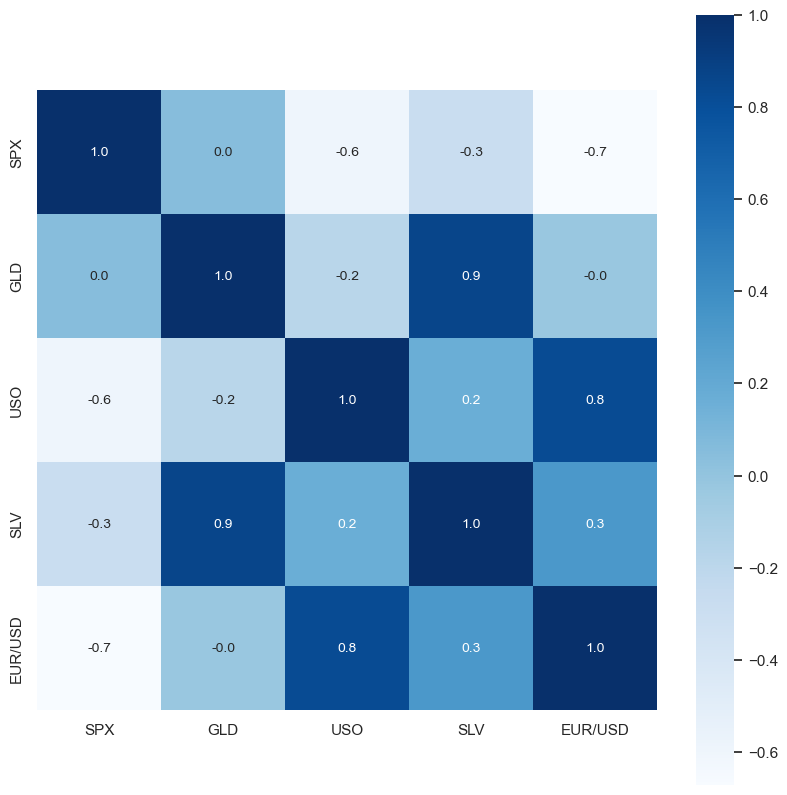

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt=".1f", annot=True, annot_kws={'size':10}, cmap='Blues')

C:\Users\mdref\AppData\Local\Temp\ipykernel_11648\3672063586.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["SPX"])


<Axes: xlabel='SPX', ylabel='Density'>

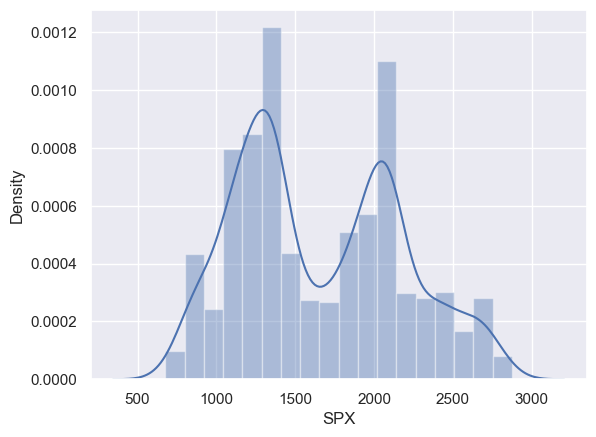

In [12]:
sns.distplot(df["SPX"])

C:\Users\mdref\AppData\Local\Temp\ipykernel_11648\2193262130.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["GLD"])


<Axes: xlabel='GLD', ylabel='Density'>

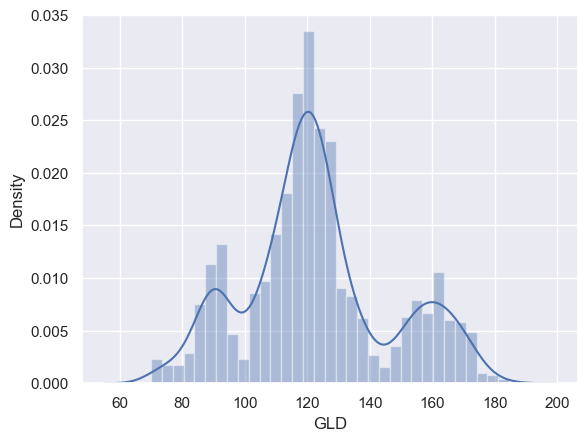

In [13]:
sns.distplot(df["GLD"])

C:\Users\mdref\AppData\Local\Temp\ipykernel_11648\517324504.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["USO"])


<Axes: xlabel='USO', ylabel='Density'>

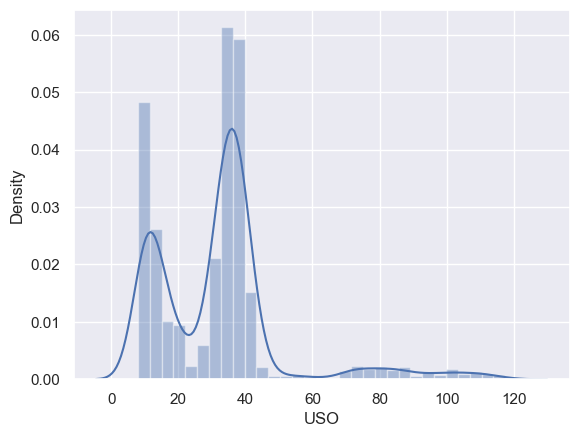

In [14]:
sns.distplot(df["USO"])

C:\Users\mdref\AppData\Local\Temp\ipykernel_11648\3013485620.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["SLV"])


<Axes: xlabel='SLV', ylabel='Density'>

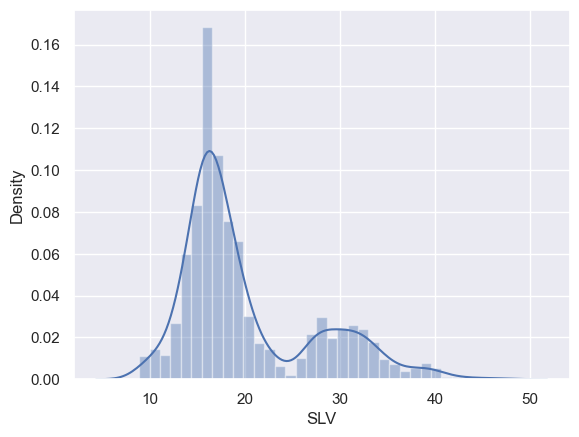

In [15]:
sns.distplot(df["SLV"])

C:\Users\mdref\AppData\Local\Temp\ipykernel_11648\2886296398.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["EUR/USD"])


<Axes: xlabel='EUR/USD', ylabel='Density'>

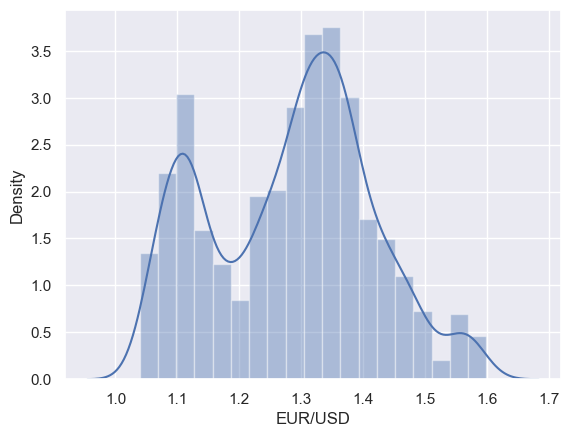

In [16]:
sns.distplot(df["EUR/USD"])

In [17]:
X = df.drop(columns=['Date','GLD'], axis=1)
Y = df["GLD"]

In [18]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [19]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [21]:
print(X.shape, X_train.shape, X_test.shape)

(2290, 4) (1832, 4) (458, 4)


In [22]:
# Model Training
model1 = LinearRegression()
model2 = Lasso()
model3 = XGBRegressor()

model4 = RandomForestRegressor(n_estimators = 200)

In [23]:
model1.fit(X_train, Y_train)

LinearRegression()

In [24]:
model2.fit(X_train, Y_train)

Lasso()

In [25]:
model3.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [26]:
model4.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=200)

In [27]:
# Evaluation LR

test_data_prediction1 = model1.predict(X_test)

In [28]:
print(test_data_prediction1)

[159.45290968  81.50858067 113.4868037  128.55153817 126.20403783
 141.31818338 165.49416492 124.44197659 113.95389904 122.9965895
 113.95492464 174.89529849 132.66890174 159.24793304 118.8791679
 122.14315717 150.37153054 161.27175405 152.2792036  162.19946709
 145.88372183 118.07669395 180.21729122 178.13331554 123.51701986
  98.82914322  76.63486248 119.38435511 113.85027665 159.25706609
  93.76037617 120.05334649  88.61086583 114.28801659 112.77954274
 144.19518102 118.78252489 115.87334354 144.06409553 113.81864246
 100.49676727  89.42842238 120.36720699 110.47635305 146.4894628
 119.30321261 110.99311348 111.3386287   96.48139076 123.40842816
  79.51413425 115.36111603 121.78896764 114.55367722 120.9074622
 117.10612464 152.31198525 182.7735091  196.73570503  91.06670951
 101.92097594  87.48443506  94.33158785 119.17357764 121.8935122
 125.85678089 163.2699701  122.91100556 113.55098736 104.06905043
 155.16775229 176.87972077 125.62460858 113.85896766 119.69577146
 120.03159609 1

In [29]:
r2_error_score_lr = metrics.r2_score(Y_test, test_data_prediction1)

In [30]:
print("R Square Error  [Linear Regression]: ", r2_error_score_lr)

R Square Error  [Linear Regression]:  0.8657886565869237


In [31]:
mean_error_score_lr = metrics.mean_absolute_error(Y_test, test_data_prediction1)

In [32]:
print("Mean Absolute Error  [Linear Regression]: ", mean_error_score_lr)

Mean Absolute Error  [Linear Regression]:  5.911486735777762


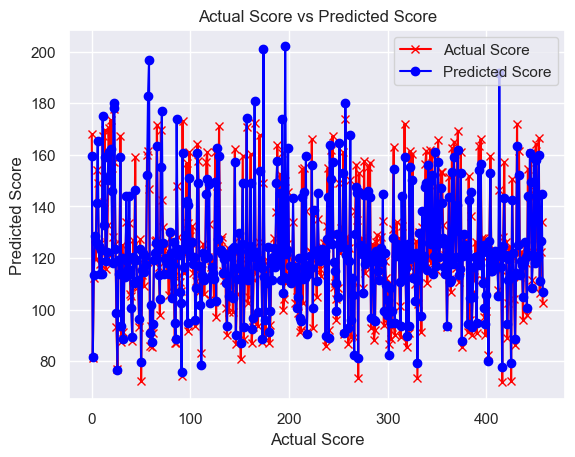

In [33]:
# Visualizing the output

index = np.arange(len(Y_test))
plt.plot(index, Y_test, label="Actual Score", color="red", marker="x")
plt.plot(index, test_data_prediction1, label="Predicted Score", color="blue", marker="o")
plt.title("Actual Score vs Predicted Score")
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.legend()
plt.show()

In [34]:
# Evaluation Lasso

test_data_prediction2 = model2.predict(X_test)

In [35]:
print(test_data_prediction2)

[158.84512104  81.04703403 113.21813043 128.24921821 125.52591531
 140.30328872 165.77178016 125.05258374 114.14910705 123.5210702
 114.13628642 175.00866734 132.57640461 158.51043648 117.92572817
 121.77591509 150.20780434 160.68906278 151.64461382 161.99333696
 145.4120571  118.34738175 180.39772754 178.24472286 124.27696964
  99.80255205  76.60316115 120.19171432 114.14002363 158.50355697
  94.04763779 120.96974119  87.74083986 113.98321611 112.01201714
 143.73115966 117.95660144 115.64610606 143.40791656 113.24451605
 101.05231751  89.20936638 121.32125716 110.20612872 145.64975126
 120.04248218 110.9111235  110.91371884  96.98342951 124.04251147
  78.81883439 114.75212601 121.30272027 114.15079702 121.28412116
 117.14793    152.17201044 182.85683662 196.50648401  91.38003712
 102.03203664  87.21288355  94.86738033 119.75731252 122.89946985
 126.45014785 162.69953582 123.43722793 113.82668401 105.40827478
 154.71258084 176.85393576 126.04417855 113.41643749 120.1284545
 120.7360009

In [36]:
r2_error_score_lar = metrics.r2_score(Y_test, test_data_prediction2)

In [37]:
print("R Square Error [Lasso Regression]: ", r2_error_score_lar)

R Square Error [Lasso Regression]:  0.8644937172756186


In [38]:
mean_error_score_lar = metrics.mean_absolute_error(Y_test, test_data_prediction2)

In [39]:
print("Mean Absolute Error [Lasso Regression]: ", mean_error_score_lar)

Mean Absolute Error [Lasso Regression]:  5.872282558643683


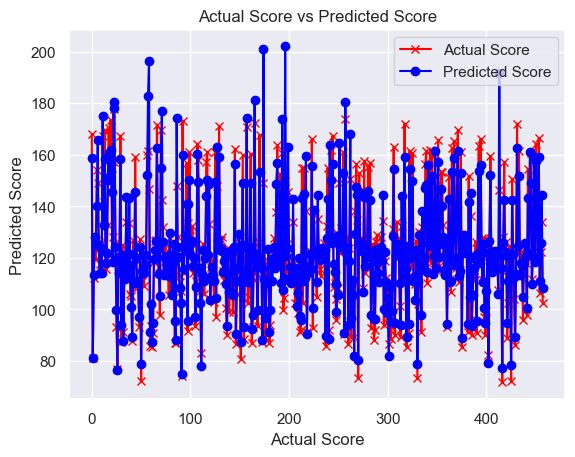

In [40]:
# Visualizing the output

index = np.arange(len(Y_test))
plt.plot(index, Y_test, label="Actual Score", color="red", marker="x")
plt.plot(index, test_data_prediction2, label="Predicted Score", color="blue", marker="o")
plt.title("Actual Score vs Predicted Score")
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.legend()
plt.show()

In [41]:
# Model Evaluation XGBoostRegression

test_data_prediction3 = model3.predict(X_test)

In [42]:
print(test_data_prediction3)

[167.56625   82.741806 114.9159   127.280754 119.89669  154.46346
 148.12573  125.654564 117.13344  126.57594  115.70429  170.20004
 141.28601  166.35875  115.34768  116.55747  132.69386  168.47319
 155.88724  154.56068  154.548    125.083595 175.38089  155.30037
 124.658676  94.86648   73.85175  120.84357  119.05474  167.72997
  87.99669  123.822105  91.20638  117.68014  120.74184  134.09122
 115.27301  114.639725 140.86195  107.93714  104.41204   87.3144
 126.99432  116.56484  159.16661  120.61215  109.652534 108.19997
  93.70222  127.449844  78.94714  112.84591  121.793625 110.50628
 119.08074  119.61162  153.34     168.7827   147.15099   87.00325
  95.19087   86.99271   90.521    118.65545  127.28675  127.387665
 170.31439  122.570175 117.57618   97.008026 168.41344  142.74638
 133.70937  120.53631  123.48939  120.58683  114.15447  117.71427
 107.86178  127.604645 114.03106  106.24436  116.73157  119.58104
  88.86771   88.02252  144.72743  127.938385 113.35239  109.89379
 106.50336

In [43]:
r2_error_score_xgb = metrics.r2_score(Y_test, test_data_prediction3)

In [44]:
print("R Sqaure Error [XGBoost Regression]: ", r2_error_score_xgb)

R Sqaure Error [XGBoost Regression]:  0.9873849231050468


In [45]:
mean_error_score_xgb = metrics.mean_absolute_error(Y_test, test_data_prediction3)

In [46]:
print("Mean Absolute Error [XGBoost Regression]: ", mean_error_score_xgb)

Mean Absolute Error [XGBoost Regression]:  1.4647312363547778


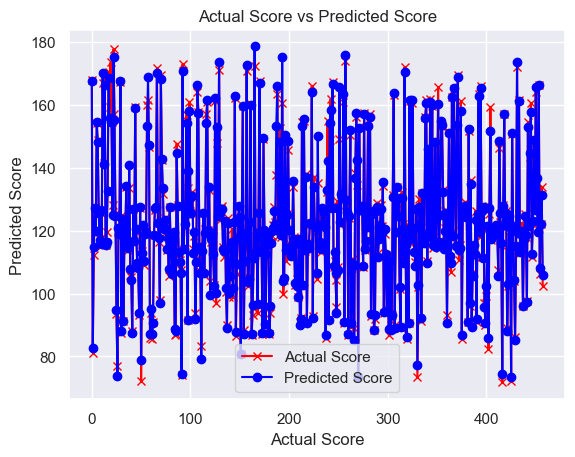

In [47]:
# Visualizing the output

index = np.arange(len(Y_test))
plt.plot(index, Y_test, label="Actual Score", color="red", marker="x")
plt.plot(index, test_data_prediction3, label="Predicted Score", color="blue", marker="o")
plt.title("Actual Score vs Predicted Score")
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.legend()
plt.show()

In [48]:
# Model Evaluation XGBoostRegression

test_data_prediction4 = model4.predict(X_test)

In [49]:
print(test_data_prediction4)

[168.57114931  81.99599994 116.28285001 127.64635073 120.85825119
 154.79009772 150.30529893 126.11615024 117.62794878 125.96235078
 116.47775127 171.29835076 141.59569857 167.94839894 115.19740006
 117.64575036 139.37940305 170.09505086 159.89220335 160.5248499
 155.03675049 125.51490031 175.96514948 157.39885316 125.1392505
  93.95249958  78.01169985 120.40610012 119.03844918 167.49959937
  88.18850029 125.30700012  91.2133008  117.68420014 121.01744932
 136.33655081 115.49035142 115.30495056 147.35004984 107.29590106
 104.21410242  87.14529783 126.50565032 117.83950034 154.22689921
 119.63370001 108.43929994 108.10754814  93.19470064 127.05344775
  74.82665031 113.63739923 121.32520034 111.25464899 118.76234861
 120.67614933 158.93250023 167.96080107 147.11579673  85.9492486
  94.40740024  86.76289884  90.44255016 119.02525047 126.4116004
 127.49155004 169.71765018 122.37724946 117.30799903  98.71565032
 168.70265116 143.16364881 131.68670189 121.12055217 120.79399941
 119.65535065 

In [50]:
r2_error_score_rf = metrics.r2_score(Y_test, test_data_prediction4)

In [51]:
print("R Square Error [Random Forest Regression]: ", r2_error_score_rf)

R Square Error [Random Forest Regression]:  0.9893593573335399


In [52]:
mean_error_score_rf = metrics.mean_absolute_error(Y_test, test_data_prediction4)

print("Mean Absolute Error [Random Forest Regression]: ", mean_error_score_rf)

Mean Absolute Error [Random Forest Regression]:  1.3262893507969353


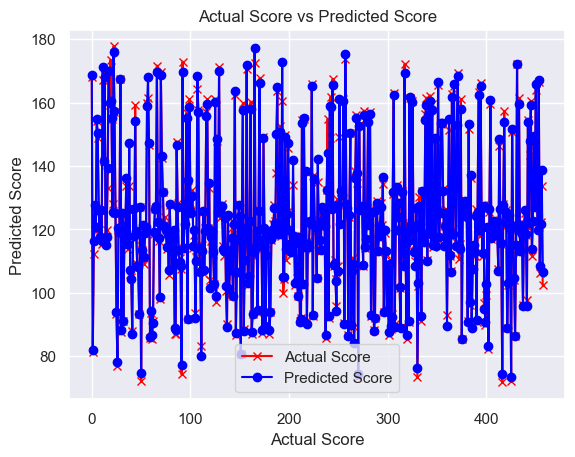

In [53]:
# Visualizing the output

index = np.arange(len(Y_test))
plt.plot(index, Y_test, label="Actual Score", color="red", marker="x")
plt.plot(index, test_data_prediction4, label="Predicted Score", color="blue", marker="o")
plt.title("Actual Score vs Predicted Score")
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.legend()
plt.show()

In [72]:
from prettytable import PrettyTable

# Create a table
table = PrettyTable()

# Define columns
table.field_names = ["Model", "R Sqaure Error", "Mean Absolute Error"]

# Add data with row span
table.add_row(["Linear Regression", r2_error_score_lr, mean_error_score_lr])
table.add_row(["Lasso Regression", r2_error_score_lar, mean_error_score_lar])
table.add_row(["XGBoost Regression", r2_error_score_xgb, mean_error_score_xgb])
table.add_row(["RandomForest Regression", r2_error_score_rf, mean_error_score_rf])

print(table)


r_error_score = [r2_error_score_lr, r2_error_score_lar, r2_error_score_xgb, r2_error_score_rf]
print("Sorted R-Sqaure Error: ", sorted(r_error_score, reverse=True))

mean_error_score = [mean_error_score_lr, mean_error_score_lar, mean_error_score_xgb, mean_error_score_rf]
print("Sorted Mean error: ", sorted(mean_error_score, reverse=True))

+-------------------------+--------------------+---------------------+
|          Model          |   R Sqaure Error   | Mean Absolute Error |
+-------------------------+--------------------+---------------------+
|    Linear Regression    | 0.8657886565869237 |  5.911486735777762  |
|     Lasso Regression    | 0.8644937172756186 |  5.872282558643683  |
|    XGBoost Regression   | 0.9873849231050468 |  1.4647312363547778 |
| RandomForest Regression | 0.9893593573335399 |  1.3262893507969353 |
+-------------------------+--------------------+---------------------+
Sorted R-Sqaure Error:  [0.9893593573335399, 0.9873849231050468, 0.8657886565869237, 0.8644937172756186]
Sorted Mean error:  [5.911486735777762, 5.872282558643683, 1.4647312363547778, 1.3262893507969353]
